Text(0, 0.5, 'y')

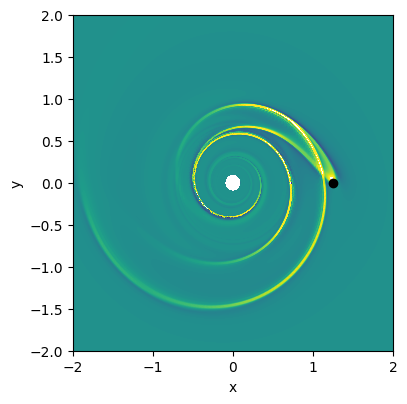

In [4]:
# read in data
import os
import math
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
%matplotlib inline

n2   = 200 # file number,
nr  = 638  # the radial grid in circular.par
ntheta = 1024 # the azimuthal grid number in circular.par

# os.chdir("/Users/RaymondMZhang/Downloads/fargo/out2circular")
# os.chdir("/Users/RaymondMZhang/Downloads/fargo/out2eccentricity0p1")
os.chdir("/Users/RaymondMZhang/Regeneron/fargo/out2eccentricity0p25")
# os.chdir("/Users/RaymondMZhang/Downloads/fargo/out2eccentricity0p5")



rho = fromfile("gasdens{0:d}.dat".format(n2), dtype='float64').reshape(nr, ntheta) #change dtype to 'float32' if your simulation is single precision
rho = np.transpose(rho)

file = open('used_rad.dat', 'r')
planet = open('planet0.dat', 'r')
rad = []

# ln(rmax / rmin) / 2pi * ntheta = nr
for line in file: # Loop through every line in the file
    line = line.strip() # The strip() removes characters from both left and right 
    columns = line.split() # Split the string into many columns
    rad = np.append(rad, float(columns[0])) # convert the column into floating numbers
    

planetxs = []
planetys = []
for line in planet: # Loop through every line in the file
    line = line.strip() # The strip() removes characters from both left and right 
    arr = line.split() # Split the string into many columns]
    arr = np.array(arr)
    arr = arr.astype(float)
    planetxs.append(arr[1])
    planetys.append(arr[2])
    

rad = (rad[1:] + rad[0:-1]) / 2. # change cell edge to cell center
theta = np.arange(0.0,2. * np.pi,2. * np.pi / ntheta)
radarr, thetaarr = np.meshgrid(rad,theta)

zmin = 0.995
zmax = 1.005
levels = np.linspace(zmin, zmax, 200)
xcoord = radarr * np.cos(thetaarr)
ycoord = radarr * np.sin(thetaarr)
plt.contourf(xcoord, ycoord, rho, levels = levels)
#plt.contourf(np.log10(rad), theta, rho, levels = levels)
#plt.plot(x,y)
plt.plot(planetxs[n2],planetys[n2], color = 'black', marker = 'o')
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.6, top=0.8)

#plt.xlim([-1.,0.5])
#plt.xlabel('log(r)')
#plt.ylim([0.,2*math.pi])
#plt.ylabel('theta')
plt.xlim([-2,2])
plt.xlabel('x')
plt.ylim([-2,2])
plt.ylabel('y')

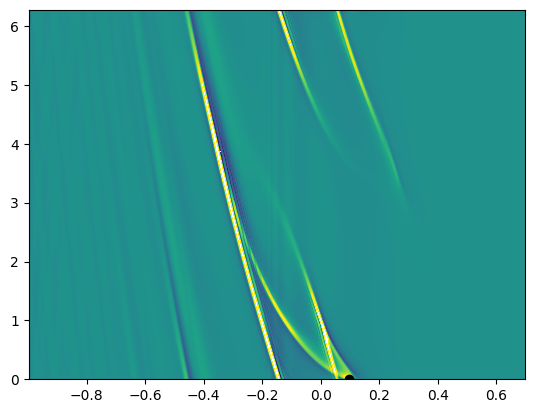

In [6]:
# log plot

plt.contourf(np.log10(rad), theta, rho, levels = levels)
plt.plot(np.log10(np.sqrt(planetxs[n2]*planetxs[n2]+planetys[n2]*planetys[n2])),np.arctan2(planetys[n2],planetxs[n2]), color = 'black', marker = 'o')

plt.show()